# **👑DATA SCHOOL TEAM PROJECT**  
**┗ 고객획득비용(CAC) 분석을 통한 광고 전략 최적화**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 데이터 전처리
* Process 1: 데이터 EDA


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/MyDrive')
# os.getcwd()

In [3]:
import pandas as pd

df = pd.read_csv('ConsumerElectronics.csv')
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


## **데이터 전처리**

In [4]:
print(df.shape)

(1648824, 20)


In [5]:
# 날짜 변환
# 매출 float로 바꾸기 (gmv)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

df['gmv'] = df['gmv'].replace(' ', '0')
df['gmv'] = df['gmv'].astype(float)

In [7]:
df.isnull().sum()

,0
fsn_id,0
order_date,0
Year,0
Month,0
order_id,0
order_item_id,0
gmv,0
units,0
deliverybdays,0
deliverycdays,0


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_date,1648824,2016-01-10 05:24:13.429956608,2015-05-19 13:42:09,2015-10-16 17:40:54.249999872,2016-01-07 12:39:11.500000,2016-04-01 13:12:09.500000,2016-07-25 01:19:45,NaN
Year,1648824.0,2015.518555,2015.0,2015.0,2016.0,2016.0,2016.0,0.499656
Month,1648824.0,6.58565,1.0,3.0,6.0,10.0,12.0,3.623351
order_id,1648824.0,2842444674146622.0,76331515.0,1602588503969575.0,2611824528743350.0,3610613539366250.0,5395076790260600.0,1269134332596894.25
order_item_id,1648824.0,13756277530325592.0,108016495.0,1606725138262300.0,2619185472741150.0,4397705931628400.0,300037347717704000.0,55945981798631008.0
gmv,1648824.0,2453.804126,0.0,339.0,749.0,1999.0,226947.0,5612.080621
units,1648824.0,1.022087,1.0,1.0,1.0,1.0,50.0,0.253532
sla,1648824.0,5.687832,0.0,4.0,6.0,7.0,1006.0,2.983336
product_mrp,1648824.0,4108.308611,0.0,799.0,1599.0,3499.0,299999.0,8510.917768
product_procurement_sla,1648824.0,5.403451,-1.0,1.0,2.0,3.0,1000.0,53.466182


In [11]:
df_media = pd.read_csv('Media Investment.csv')  # 광고 및 투자 내역
df_nps = pd.read_csv('NPS_Stockindex.csv')  # NPS(고객충성도 지표), Stock Index(주가 지수) 정보
df_promo = pd.read_csv('Special_Sale_Calendar.csv')  # 마케팅 프로모션 기간 정보

In [12]:
print(df_media.shape)
df_media.head(12)

(12, 12)


,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,0.0,0.0
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,0.0,0.0
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,0.0,0.0
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,0.0,0.0
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,0.0,0.0
5,2015,12,106.7,5.4,3.1,56.7,1.1,22.5,6.8,11.2,0.0,0.0
6,2016,1,74.2,4.4,0.5,4.2,0.9,22.9,7.4,4.2,2.7,27.1
7,2016,2,48.1,2.6,1.9,11.7,0.6,19.9,6.5,4.9,0.0,0.0
8,2016,3,100.0,9.3,2.1,41.6,0.4,18.4,6.2,5.2,0.9,15.9
9,2016,4,56.8,5.2,0.9,24.3,0.0,16.5,5.7,4.2,0.0,0.0


In [13]:
print(df_nps.shape)
df_nps.head(10)

(2, 13)


,index,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.6,60.0,46.9,44.4,47.0,45.8,47.1,50.3,49.0,51.8,47.3,50.5
1,Stock Index,1177.0,1206.0,1101.0,1210.0,1233.0,1038.0,1052.0,1222.0,1015.0,1242.0,1228.0,1194.0


In [14]:
print(df_promo.shape)
df_promo.head(10)

(6, 2)


,2015,2016
0,(18-19th July),(20-22 Jan)
1,(15-17th Aug),(1-2 Feb)
2,(28-30th Aug),(20-21 Feb)
3,(15-17th Oct),(14-15 Feb)
4,(7-14th Nov),(7-9 Mar)
5,(25th Dec'15 - 3rd Jan'16),(25-27 May)


In [15]:
print(df_media.isnull().sum())
print(df_nps.isnull().sum())
print(df_promo.isnull().sum())

Year                 0
Month                0
Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                0
Other                0
dtype: int64
index      0
July'15    0
Aug'15     0
Sept'15    0
Oct'15     0
Nov'15     0
Dec'15     0
Jan'16     0
Feb'16     0
Mar'16     0
Apr'16     0
May'16     0
June'16    0
dtype: int64
2015    0
2016    0
dtype: int64


In [16]:
df_media.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12.0,2015.500000,0.522233,2015.0,2015.000,2015.50,2016.000,2016.0
Month,12.0,6.500000,3.605551,1.0,3.750,6.50,9.250,12.0
Total Investment,12.0,70.550000,44.533736,5.1,46.775,65.50,97.225,170.2
TV,12.0,3.700000,2.688021,0.0,1.625,4.05,5.250,9.3
Digital,12.0,2.483333,3.270205,0.5,1.200,1.40,2.200,12.6
Sponsorship,12.0,30.450000,26.232301,1.1,10.625,24.65,45.375,84.7
Content Marketing,12.0,0.666667,0.944201,0.0,0.000,0.50,0.825,3.4
Online marketing,12.0,16.141667,8.456892,0.1,14.300,19.00,22.600,24.4
Affiliates,12.0,5.116667,2.556928,0.1,4.450,6.35,6.800,7.4
SEM,12.0,7.591667,7.953325,2.5,4.200,5.10,6.375,31.9


In [17]:
df_nps.describe().T

,count,mean,std,min,25%,50%,75%,max
July'15,2.0,615.80,793.656651,54.6,335.200,615.80,896.400,1177.0
Aug'15,2.0,633.00,810.344371,60.0,346.500,633.00,919.500,1206.0
Sept'15,2.0,573.95,745.361258,46.9,310.425,573.95,837.475,1101.0
Oct'15,2.0,627.20,824.203664,44.4,335.800,627.20,918.600,1210.0
Nov'15,2.0,640.00,838.628642,47.0,343.500,640.00,936.500,1233.0
Dec'15,2.0,541.90,701.591348,45.8,293.850,541.90,789.950,1038.0
Jan'16,2.0,549.55,710.571604,47.1,298.325,549.55,800.775,1052.0
Feb'16,2.0,636.15,828.517016,50.3,343.225,636.15,929.075,1222.0
Mar'16,2.0,532.00,683.065151,49.0,290.500,532.00,773.500,1015.0
Apr'16,2.0,646.90,841.598491,51.8,349.350,646.90,944.450,1242.0


In [18]:
df_promo.describe().T

,count,unique,top,freq
2015,6,6,(18-19th July),1
2016,6,6,(20-22 Jan),1


## **Process 1: 데이터 EDA**

In [19]:
# df_media에 광고비는 계산되어 있다.
# df에서 제품 카테고리별 고객수를 분석한다.

df_media.head(12)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,0.0,0.0
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,0.0,0.0
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,0.0,0.0
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,0.0,0.0
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,0.0,0.0
5,2015,12,106.7,5.4,3.1,56.7,1.1,22.5,6.8,11.2,0.0,0.0
6,2016,1,74.2,4.4,0.5,4.2,0.9,22.9,7.4,4.2,2.7,27.1
7,2016,2,48.1,2.6,1.9,11.7,0.6,19.9,6.5,4.9,0.0,0.0
8,2016,3,100.0,9.3,2.1,41.6,0.4,18.4,6.2,5.2,0.9,15.9
9,2016,4,56.8,5.2,0.9,24.3,0.0,16.5,5.7,4.2,0.0,0.0


In [20]:
cols_categorical = df.select_dtypes(include=object).columns
cols_numerical = df.select_dtypes(exclude=object).columns

In [21]:
# 제품 분류와 관련된 세개의 값을 분석한다.
# product_analytic_category, product_analytic_sub_category, product_analytic_vertical
# 나머지 카테고리컬은 크게 의미가 없다.

for col in cols_categorical:
  print(f'{col}: {df[col].nunique()}')

h_categories = df['product_analytic_category'].unique()
m_categories = df['product_analytic_sub_category'].unique()
l_categories = df['product_analytic_vertical'].unique()

fsn_id: 21219
deliverybdays: 143
deliverycdays: 171
s1_fact.order_payment_type: 2
cust_id: 1253495
pincode: 12973
product_analytic_super_category: 1
product_analytic_category: 5
product_analytic_sub_category: 14
product_analytic_vertical: 74


### **제품별 고객수**

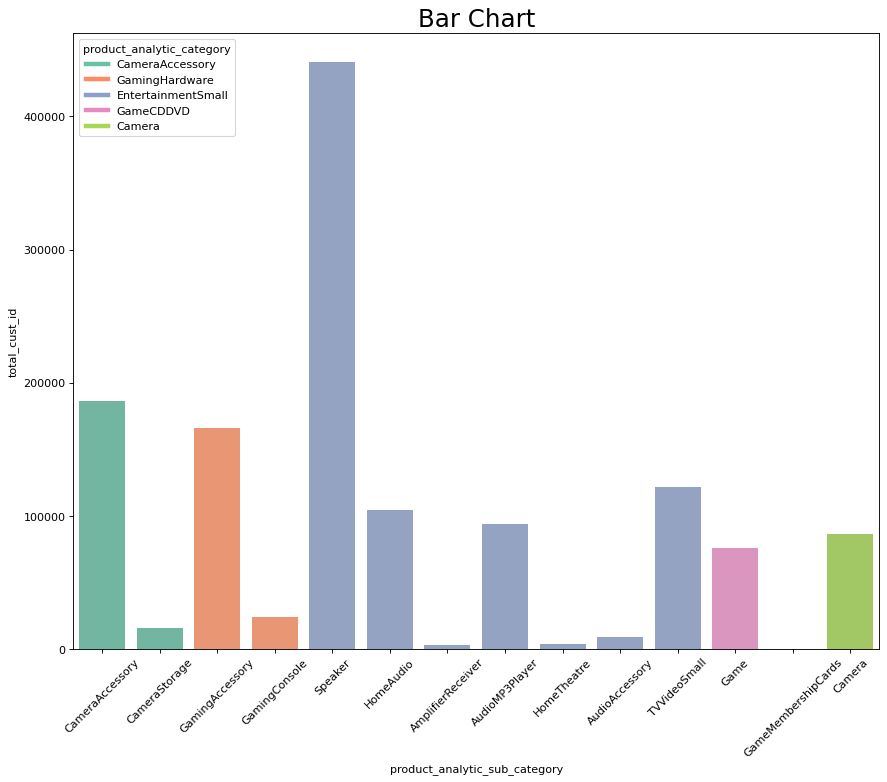

In [22]:
# 바 차트

df_temp = df.copy()
col1 = 'product_analytic_category'
col2 = 'product_analytic_sub_category'

unique_categories = df_temp[col1].unique()
palette = sns.color_palette("Set2", len(unique_categories))
category_colors = dict(zip(unique_categories, palette))

df_temp['total_cust_id'] = df_temp.groupby([col1, col2])['cust_id'].transform('nunique')

plt.figure(figsize=(13, 10), dpi=80)
for category in unique_categories:
    sub_df = df_temp[df_temp[col1] == category]
    sns.barplot(
        x=col2, y='total_cust_id', data=sub_df,
        color=category_colors[category],
        ci=None
    )
plt.title('Bar Chart', fontsize=22)
plt.xticks(rotation=45)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in category_colors.values()]
labels = list(category_colors.keys())
plt.legend(handles, labels, title=col1, loc='upper left')
plt.show()

### **제품별 매출**

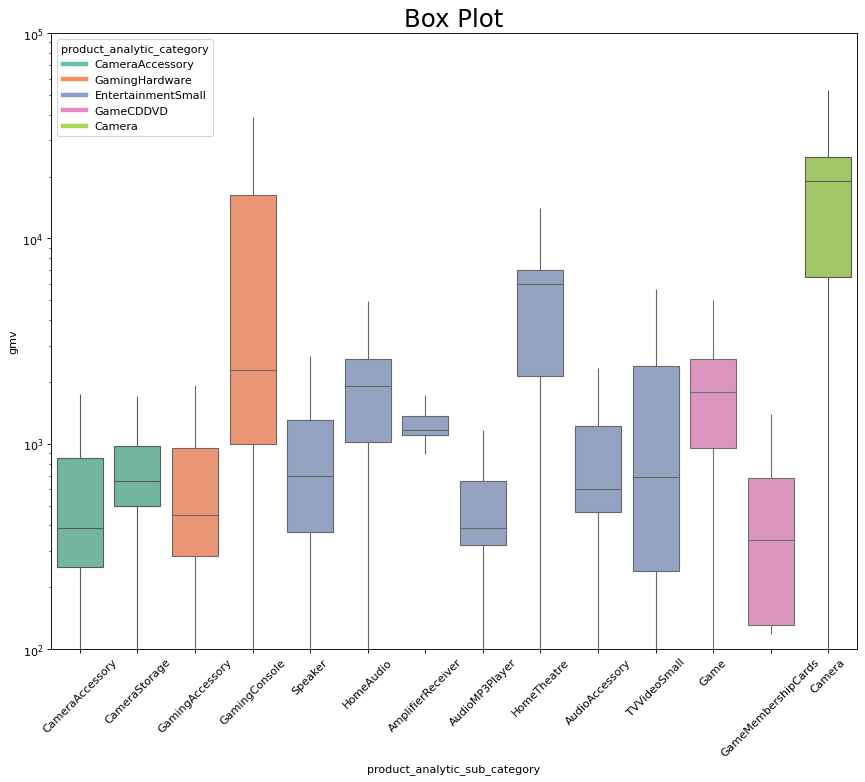

In [23]:
# 박스 플랏, 로그 스케일

df_temp = df.copy()
col1 = 'product_analytic_category'
col2 = 'product_analytic_sub_category'

unique_categories = df_temp[col1].unique()
palette = sns.color_palette("Set2", len(unique_categories))
category_colors = dict(zip(unique_categories, palette))

plt.figure(figsize=(13, 10), dpi=80)
for category in unique_categories:
    sub_df = df_temp[df_temp[col1] == category]
    sns.boxplot(
        x=col2, y='gmv', data=sub_df,
        color=category_colors[category],
        showcaps=False, showfliers=False
    )
plt.title('Box Plot', fontsize=22)
plt.ylim(10e01, 10e04)
plt.yscale('log')
plt.xticks(rotation=45)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in category_colors.values()]
labels = list(category_colors.keys())
plt.legend(handles, labels, title=col1, loc='upper left')
plt.show()

### **고객수 매출 이중축**

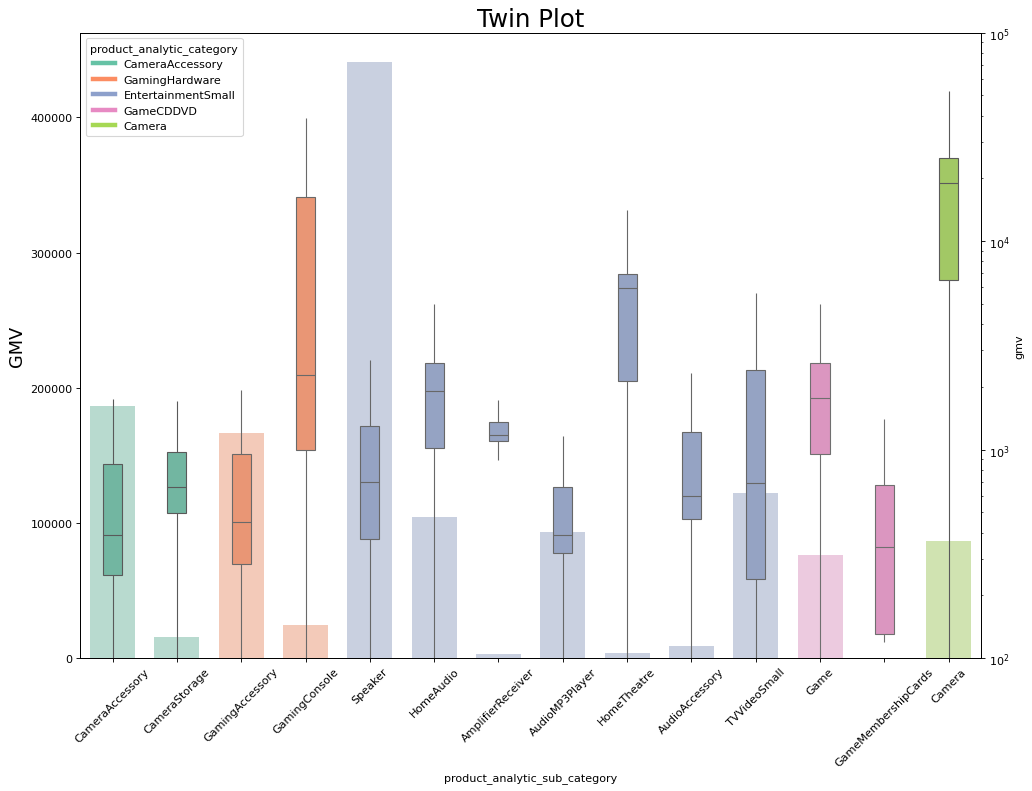

In [24]:
df_temp = df.copy()
col1 = 'product_analytic_category'
col2 = 'product_analytic_sub_category'

unique_categories = df_temp[col1].unique()
palette = sns.color_palette("Set2", len(unique_categories))
category_colors = dict(zip(unique_categories, palette))

df_temp['total_cust_id'] = df_temp.groupby([col1, col2])['cust_id'].transform('nunique')

fig, ax1 = plt.subplots(figsize=(13, 10), dpi=80)
for category in unique_categories:
    sub_df = df_temp[df_temp[col1] == category]
    sns.barplot(
        x=col2, y='total_cust_id', data=sub_df,
        color=category_colors[category],
        ci=None, ax=ax1, alpha=0.5, width=0.7
    )
ax1.set_ylabel('Cust', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
for category in unique_categories:
    sub_df = df_temp[df_temp[col1] == category]
    sns.boxplot(
        x=col2, y='gmv', data=sub_df,
        color=category_colors[category],
        showcaps=False, showfliers=False, ax=ax2, width=0.3
    )
ax2.set_title('Twin Plot', fontsize=22)
ax1.set_ylabel('GMV', fontsize=16)
ax2.set_ylim(10e01, 10e04)
ax2.set_yscale('log')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

handles = [plt.Line2D([0], [0], color=color, lw=4) for color in category_colors.values()]
labels = list(category_colors.keys())
ax1.legend(handles, labels, title=col1, loc='upper left')
plt.tight_layout()
plt.show()

### **시계열 고객수**

--------------------------------------------------
##### product_analytic_category Line #####


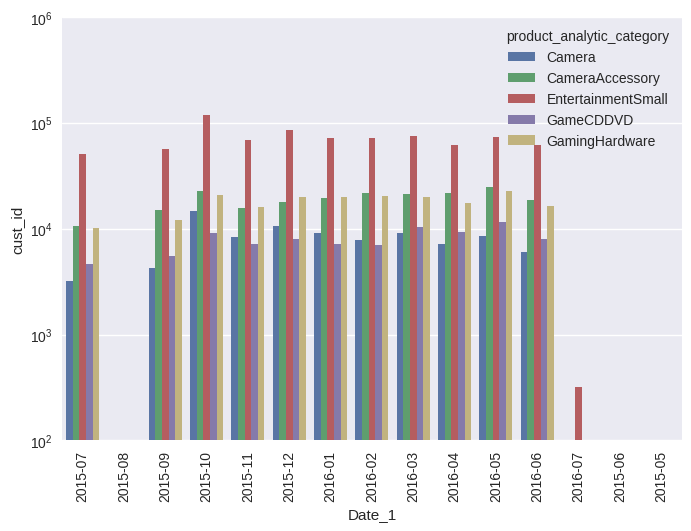

--------------------------------------------------


In [25]:
# 고객수 히스토그램

df['Date_1'] = df["order_date"].dt.strftime("%Y-%m")
plt.style.use(['seaborn-v0_8'])
for col in ['product_analytic_category']:
    print(f'-'*50)
    print(f'##### {col} Line #####')
    df_temp = pd.DataFrame(df.groupby([col, 'Date_1'], as_index=False)['cust_id'].nunique())  # sum, mean
    # sns.lineplot(x='Date_1', y='cust_id', hue=col, data = df_temp)
    sns.barplot(x='Date_1', y='cust_id', hue=col, data = df_temp)
    plt.xticks(rotation=90)
    plt.ylim(10e01, 10e05)
    plt.yscale('log')
    plt.show()
    print(f'-'*50)

### **시계열 투자비**

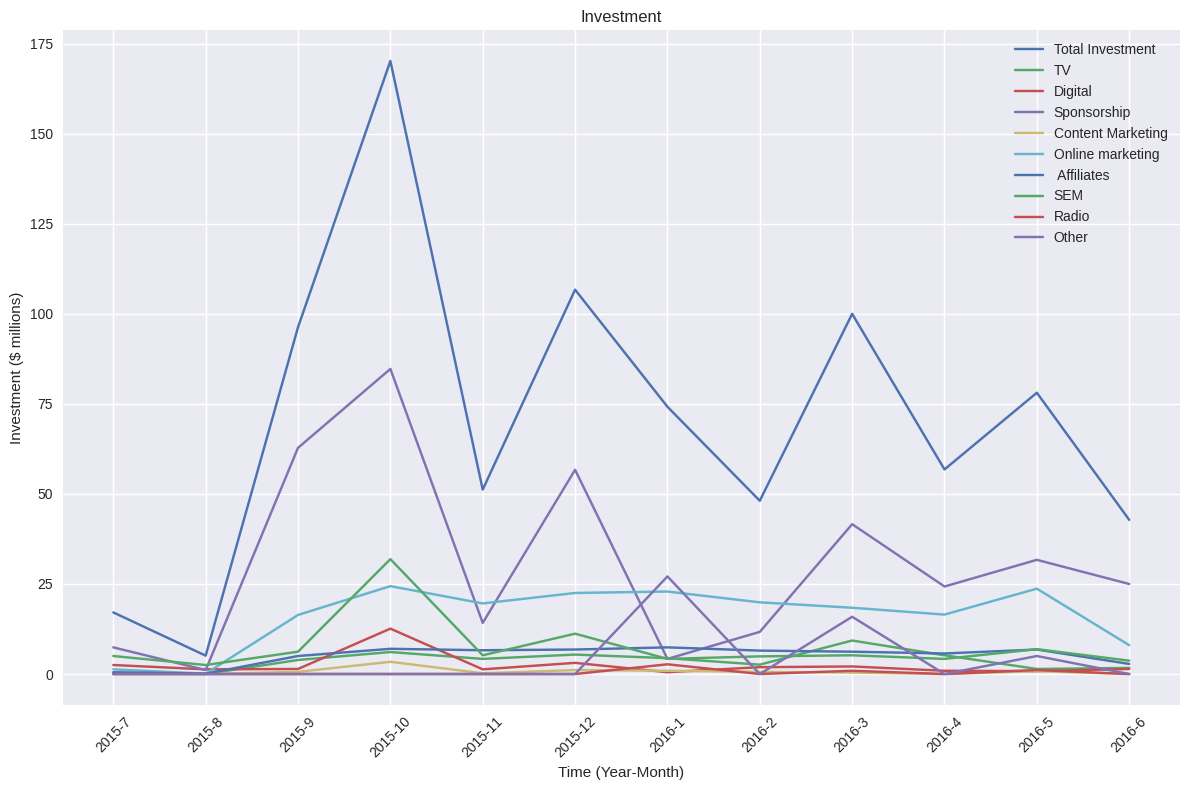

In [26]:
df_temp = df_media.copy()

medias = df_temp.columns[2:]
plt.figure(figsize=(12, 8))
for media in medias:
    plt.plot(df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str), df_temp[media], label=media)
plt.title('Investment')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Investment ($ millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [27]:
df_media.head(12)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,0.0,0.0
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,0.0,0.0
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,0.0,0.0
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,0.0,0.0
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,0.0,0.0
5,2015,12,106.7,5.4,3.1,56.7,1.1,22.5,6.8,11.2,0.0,0.0
6,2016,1,74.2,4.4,0.5,4.2,0.9,22.9,7.4,4.2,2.7,27.1
7,2016,2,48.1,2.6,1.9,11.7,0.6,19.9,6.5,4.9,0.0,0.0
8,2016,3,100.0,9.3,2.1,41.6,0.4,18.4,6.2,5.2,0.9,15.9
9,2016,4,56.8,5.2,0.9,24.3,0.0,16.5,5.7,4.2,0.0,0.0
